# Proyek Analisis Data: [bike sharing dataset]
- **Nama:** Ninda Kartika Putri
- **Email:** nindakartika.22020@mhs.unesa.ac.id
- **ID Dicoding:** ninda_kartika_putri

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weathersit?
- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D

# Definisikan palet warna
colors = sns.color_palette("husl", 4)


## Data Wrangling

### Gathering Data


In [40]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:

- Kita mendapatkan informasi tentang data rental sepeda pada tiap hari

### Assessing Data

In [41]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- kode diatas digunakan untuk menemukan missing value kolom

### Cleaning Data

In [42]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kode diatas digunakan untuk membersihkan tipe data

## Exploratory Data Analysis (EDA)

### Explore ...

In [43]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- kode diatas digunakan untuk mengeksplorasi data hour_df

In [44]:
hour_df.groupby(by=["weathersit", "yr", "weekday"]).agg({
    "instant":"nunique",
    "cnt" : ["sum", "max", "min", "mean"]
})

instant     cnt                      
                      nunique     sum  max  min        mean
weathersit yr weekday                                      
1          0  0           914  138919  500    1  151.990153
              1           805  123414  620    1  153.309317
              2           737  120874  651    1  164.008141
              3           736  114365  638    1  155.387228
              4           768  114662  628    1  149.299479
              5           842  129984  591    1  154.375297
              6           843  132835  506    1  157.574140
           1  0           851  204674  776    2  240.509988
              1           777  180083  968    1  231.767053
              2           785  206107  970    1  262.556688
              3           832  213895  977    1  257.085337
              4           888  240178  976    1  270.470721
              5           803  203337  900    1  253.221669
              6           832  214846  760    1  258.228365
2          0  0           247   31288  455    1  126.672065
              1           360   51650  591    1  143.472222
              2           364   48645  604    1  133.640110
              3           290   36828  529    1  126.993103
              4           341   49697  594    1  145.739003
              5           291   42180  566    1  144.948454
              6           325   40231  471    1  123.787692
           1  0           321   49469  626    1  154.109034
              1           366   80233  842    1  219.215847
              2           330   65666  868    1  198.987879
              3           323   76304  862    1  236.235294
              4           295   62390  905    1  211.491525
              5           368   90789  957    1  246.709239
              6           323   70582  783    2  218.520124
3          0  0            70    6867  392    1   98.100000
              1            70    5157  453    1   73.671429
              2           121   10819  579    1   89.413223
              3           202   17940  536    1   88.811881
              4           116   10193  479    1   87.870690
              5           106    9842  552    1   92.849057
              6            96    6677  378    1   69.552083
           1  0            99   12810  626    2  129.393939
              1           100   14802  856    2  148.020000
              2           116   16998  819    1  146.534483
              3            91   13680  891    1  150.329670
              4            63    8275  689    1  131.349206
              5            77   11658  565    1  151.402597
              6            92   12613  584    1  137.097826
4          0  3             1      36   36   36   36.000000
           1  1             1     164  164  164  164.000000
              6             1      23   23   23   23.000000

Insight:

- menampilkan korealasi antar weathersit, yr dan weekday

Insight:
- eksplorasi hour_df ditemukan bahwa di weathersit 5 tidak ada penyewa pada yr 2 tidak ada penyewa dan di weekday 7 tidak ada penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weathersit?

<ipython-input-45-9d7a8309e687>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


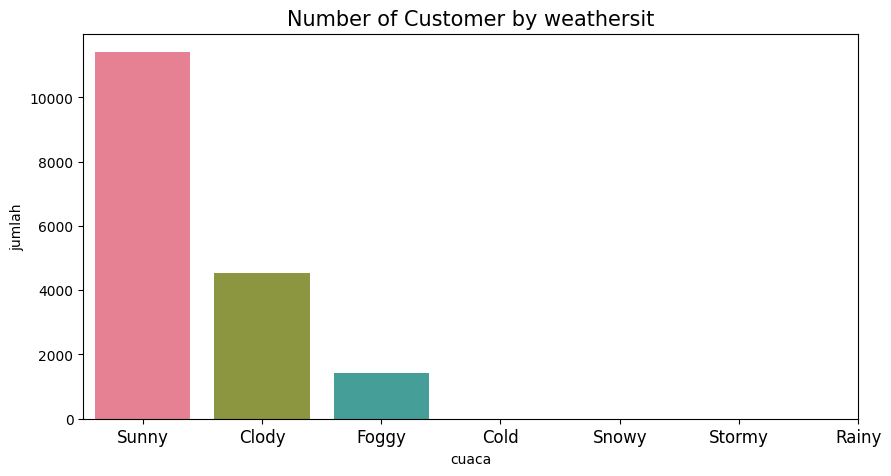

In [45]:
byweathersit_df = hour_df.groupby(by="weathersit")['instant'].nunique().reset_index()
byweathersit_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weathersit",
    data=byweathersit_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weathersit", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunny', 'Clody', 'Foggy', 'Cold', 'Snowy', 'Stormy', 'Rainy'])
plt.ylabel('jumlah')
plt.xlabel('cuaca')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
Berdasarkan Visualisasi number of customer by weathersit, cuaca sunny merupakan penyewa terbanyak sedangkan di cuaca foggy merupakan terendah

### Pertanyaan 2:Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

<ipython-input-46-f087c61d8fb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-46-f087c61d8fb9>:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


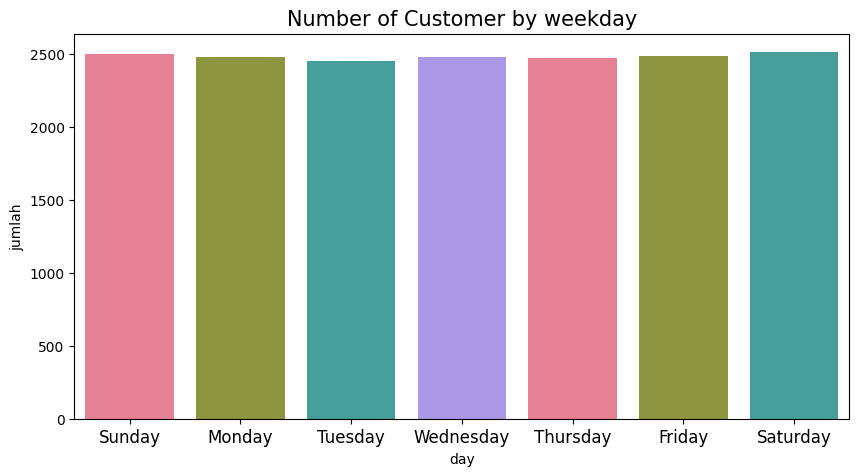

In [46]:
byweekday_df = hour_df.groupby(by="weekday")['instant'].nunique().reset_index()
byweekday_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weekday",
    data=byweekday_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weekday", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('jumlah')
plt.xlabel('day')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**

Berdasarkan visualisasi number of customer by weekday yaitu hari friday, saturday, sunday merupakan hari dengan penyewa terbanyak

## Analisis Lanjutan (Opsional)

In [47]:
import pandas as pd

# Convert the 'dteday' column to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# We assume that registered users represent those most relevant for RFM analysis
# Create a summary table for Recency, Frequency, and Monetary (based on 'registered' rentals)

# Recency: Calculate the most recent rental date and days since then
current_date = hour_df['dteday'].max()  # Ganti hour_df_df dengan hour_df
hour_df['recency'] = (current_date - hour_df['dteday']).dt.days  # Ganti hout_df dengan hour_df dan gunakan dt.days

# Frequency: Count how many times the service was used (hanya menghitung penyewa terdaftar)
frequency = hour_df['registered'].sum()

# Monetary: Total rentals (assuming the total rentals by registered users represent the monetary value)
monetary = hour_df['registered'].sum()

# Create the RFM DataFrame
rfm_data = pd.DataFrame({
    'recency': [hour_df['recency'].min()],
    'frequency': [frequency],
    'monetary': [monetary]
})

print(rfm_data)  # Menampilkan DataFrame RFM


   recency  frequency  monetary
0        0    2672662   2672662


**Insight:**
- Recency parameter yang digunakan untuk melihat kapan terakhir seorang penyewa melakukan transaksi sebesar 0
- Frequency parameter ini digunakan untuk mengidentifikasi seberapa sering seorang penyewa melakukan transaksi sebesar 2672662
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari penyewa tersebut sebesar 2672662

## Conclusion

**Kesimpulan Pertanyaan no 1**
Berdasarkan grafik yang ditampilkan:

- Cuaca cerah "Sunny" memiliki jumlah penyewaan sepeda tertinggi dibandingkan cuaca lain.
- Cuaca berawan "Cloudy" berada di urutan kedua untuk jumlah penyewaan sepeda.
- Cuaca seperti berkabut (Foggy), dingin (Cold), bersalju (Snowy), badai (Stormy), dan hujan (Rainy) memiliki jumlah penyewaan yang lebih rendah, dengan  "Cold" dan "Rainy" tampaknya sangat rendah atau bahkan tidak ada dalam grafik ini.

Kesimpulan yang bisa diambil:
Penyewaan sepeda cenderung lebih banyak terjadi pada cuaca cerah (Sunny) dan berawan (Cloudy), sementara cuaca buruk seperti hujan, badai, dan salju menunjukkan penurunan signifikan. Strategi seperti promosi diskon atau layanan tambahan dapat digunakan untuk meningkatkan penyewaan sepeda selama kondisi cuaca yang kurang ideal.

**Kesimpulan Pertanyaan no 2**
Berdasarkan grafik yang ditampilkan, jumlah pelanggan penyewa sepeda berdasarkan hari dalam seminggu (weekday) relatif konsisten, tetapi ada beberapa perbedaan kecil.

Kesimpulan yang bisa diambil:
Tidak ada hari yang jumlah pelanggannya jauh lebih tinggi atau lebih rendah. Ini menunjukkan bahwa penggunaan sepeda cukup stabil sepanjang minggu.
Hari Selasa dan Kamis memiliki jumlah pelanggan yang sedikit lebih rendah, sementara hari sabtu dan minggu cenderung lebih tinggi, meskipun perbedaannya tidak terlalu besar.
Secara keseluruhan, jumlah penyewa sepeda tidak terlalu dipengaruhi oleh hari dalam seminggu, karena permintaannya cenderung stabil setiap hari.










## Analisis lanjutan
layanan penyewaan sepeda berdasarkan cuaca dan waktu menunjukkan bahwa cuaca yang baik secara signifikan meningkatkan jumlah penyewaan, sementara cuaca buruk mengurangi minat pelanggan. Hubungan antara cuaca dan waktu menciptakan peluang bagi perusahaan untuk mengembangkan strategi pemasaran yang efisien, seperti promosi ketika cuaca mendukung dan menyediakan fasilitas tambahan untuk penyewaan . Penelitian lebih lanjut dapat dilakukan untuk mengeksplorasi jenis sepeda atau layanan lain yang sesuai dengan preferensi pelanggan. Dengan mengintegrasikan temuan-temuan ini, perusahaan dapat meningkatkan pengalaman pelanggan dan tarif sewa secara keseluruhan. namun Jika data individu penyewa tersedia, analisis RFM dapat digunakan untuk mengidentifikasi perilaku pengguna dengan lebih spesifik, seperti berapa kali mereka menyewa, kapan terakhir kali mereka menggunakan layanan, dan seberapa besar nilai yang mereka berikan. Dengan pendekatan ini, perusahaan dapat merancang strategi pemasaran yang lebih terarah




